Инициализация датасета:

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Ger_Used_Cars = pd.read_csv('data.csv', encoding='ISO-8859-1')
Ger_Used_Cars.info()

Ger_Used_Cars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-tÃ¼rig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360Â°*beh.Lenk


Очистка датасета от дупликатов, пропусков, некорректных строк:

In [34]:
def fuel_consumption_g(column):
    list_column = list(str(column))
    if list_column[0] == '-' or column == None:
        return None
    else:
        splited_column = str(column).split(" ")
        result_column = splited_column[0]
        if result_column.isdigit():
            return int(result_column)
        else:
            return None
    
def fuel_consumption_100(column):
    list_column = list(str(column))
    if list_column[0] == '-' or column == None:
        return None
    else:
        splited_column = str(column).split(" ")
        result_column = splited_column[0]
        result_column = result_column.replace(",", ".")
        result_column_replaced = result_column.replace(".", "")
        if result_column_replaced.isdigit():
            return float(result_column)
        else:
            return None

In [35]:
type(Ger_Used_Cars['fuel_consumption_g_km'][0])

str

In [36]:
Ger_Used_Cars['price_in_euro'] = Ger_Used_Cars['price_in_euro'].replace('[a-zA-Z]', np.nan, regex=True)



Ger_Used_Cars['fuel_consumption_g_km'] = Ger_Used_Cars['fuel_consumption_g_km'].apply(fuel_consumption_g)
Ger_Used_Cars['fuel_consumption_l_100km'] = Ger_Used_Cars['fuel_consumption_l_100km'].apply(fuel_consumption_100)

In [37]:
# Ger_Used_Cars = Ger_Used_Cars.drop('fuel_consumption_g_km', axis=1)
Ger_Used_Cars = Ger_Used_Cars.dropna(thresh=15 , axis = 0)
Ger_Used_Cars = Ger_Used_Cars.drop_duplicates()

Ger_Used_Cars['price_in_euro'] = Ger_Used_Cars['price_in_euro'].astype(int)
Ger_Used_Cars['power_kw'] = Ger_Used_Cars['power_kw'].astype(int)
Ger_Used_Cars['power_ps'] = Ger_Used_Cars['power_ps'].astype(int)
Ger_Used_Cars['mileage_in_km'] = Ger_Used_Cars['mileage_in_km'].astype(int)
Ger_Used_Cars['year'] = Ger_Used_Cars['year'].astype(int)

Ger_Used_Cars.info()
Ger_Used_Cars

<class 'pandas.core.frame.DataFrame'>
Index: 199579 entries, 0 to 251076
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                199579 non-null  int64  
 1   brand                     199579 non-null  object 
 2   model                     199579 non-null  object 
 3   color                     199579 non-null  object 
 4   registration_date         199579 non-null  object 
 5   year                      199579 non-null  int32  
 6   price_in_euro             199579 non-null  int32  
 7   power_kw                  199579 non-null  int32  
 8   power_ps                  199579 non-null  int32  
 9   transmission_type         199579 non-null  object 
 10  fuel_type                 199579 non-null  object 
 11  fuel_consumption_l_100km  199579 non-null  float64
 12  fuel_consumption_g_km     199579 non-null  float64
 13  mileage_in_km             199579 non-null  int32 

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,10.9,260.0,160500,2.0 V6 TB
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,9.5,225.0,189500,2.0 16V Twin Spark L
5,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,9.5,225.0,47307,2.0 16V Twin Spark
6,6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,8.8,210.0,230000,Quadrifoglio
7,7,alfa-romeo,Alfa Romeo 164,black,07/1996,1996,5500,132,179,Manual,Petrol,13.4,320.0,168000,(3.0) V6 Super
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251071,251071,volvo,Volvo XC60,silver,04/2023,2023,81350,228,310,Automatic,Hybrid,7.4,167.0,60,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
251072,251072,volvo,Volvo XC60,silver,05/2023,2023,55400,145,197,Automatic,Diesel,5.6,142.0,5000,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
251073,251073,volvo,Volvo XC60,silver,03/2023,2023,54500,145,197,Automatic,Diesel,5.6,142.0,5900,B4 Autom. Plus Dark Sitzhzg.
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,7.6,202.0,4900,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [38]:
column = 'price_in_euro'

# Рассчитываем интерквартильный размах (IQR)
Q1 = Ger_Used_Cars[column].quantile(0.25)
Q3 = Ger_Used_Cars[column].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем строки с выбросами
Ger_Used_Cars = Ger_Used_Cars[(Ger_Used_Cars[column] >= lower_bound) & (Ger_Used_Cars[column] <= upper_bound)]

In [39]:
row_count = Ger_Used_Cars.shape[0]
column_count = Ger_Used_Cars.shape[1]
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')

The DataFrame has 187467 rows.
The DataFrame has 15 columns.


Диаграммы рассеивания

<Axes: xlabel='price_in_euro', ylabel='mileage_in_km'>

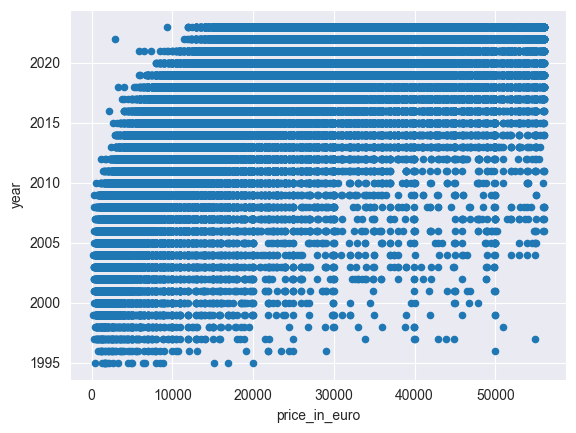

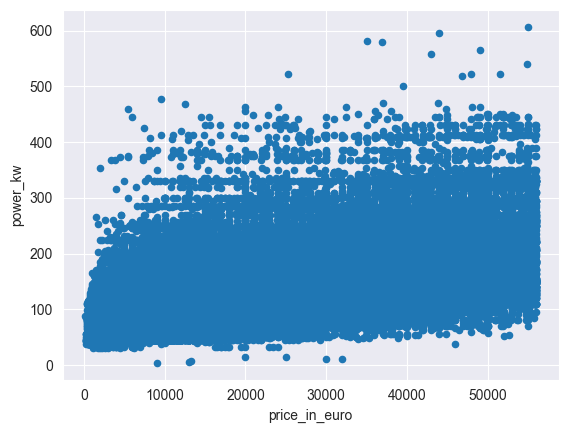

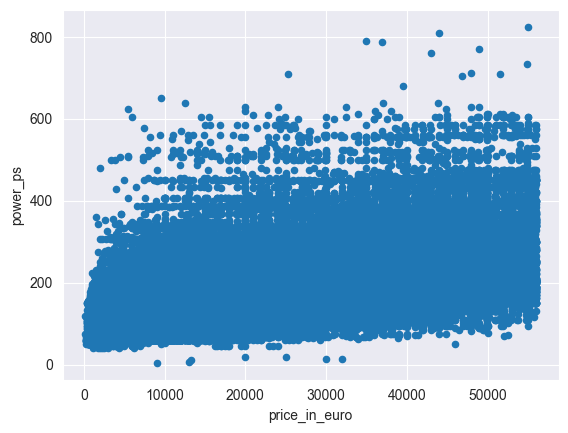

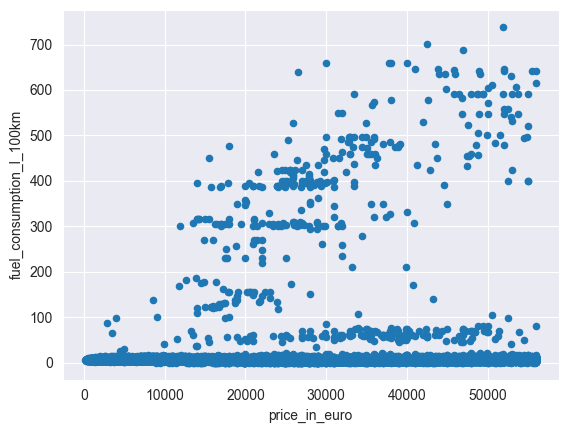

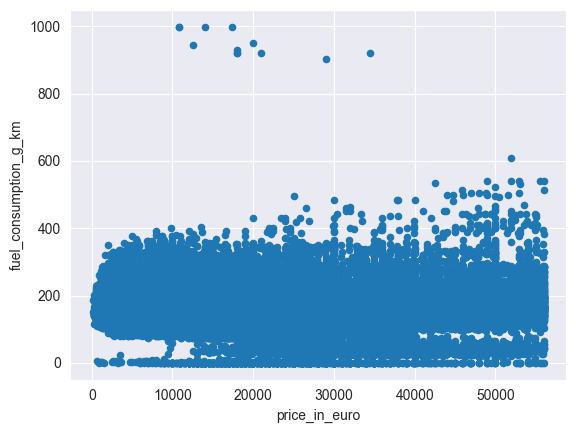

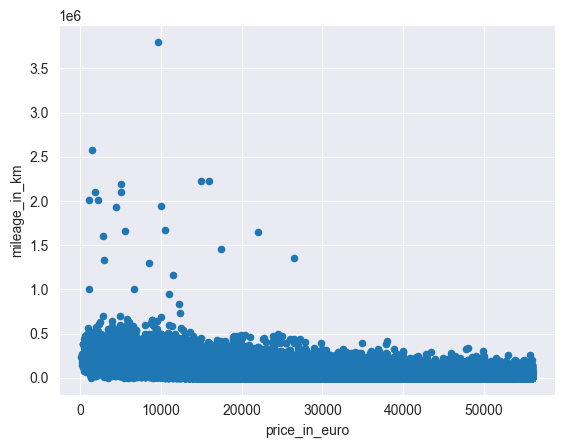

In [40]:
Ger_Used_Cars.plot.scatter(y = 'year', x = 'price_in_euro')
Ger_Used_Cars.plot.scatter(y = 'power_kw', x = 'price_in_euro')
Ger_Used_Cars.plot.scatter(y = 'power_ps', x = 'price_in_euro')
Ger_Used_Cars.plot.scatter(y = 'fuel_consumption_l_100km', x = 'price_in_euro')
Ger_Used_Cars.plot.scatter(y = 'fuel_consumption_g_km', x = 'price_in_euro')
Ger_Used_Cars.plot.scatter(y = 'mileage_in_km', x = 'price_in_euro')

Ящики с усами

<Axes: title={'center': 'price_in_euro'}, xlabel='color'>

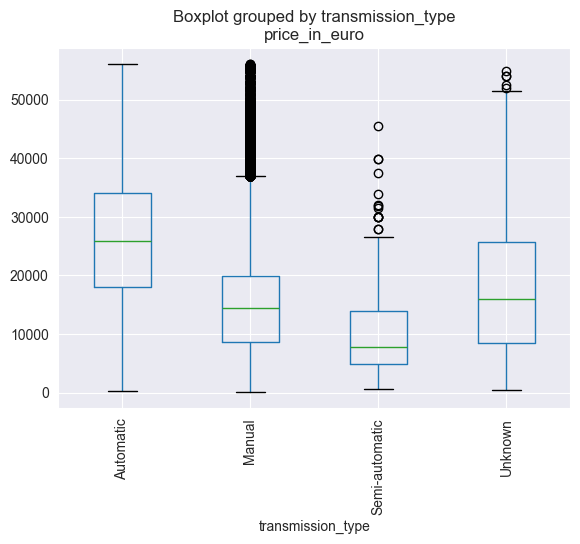

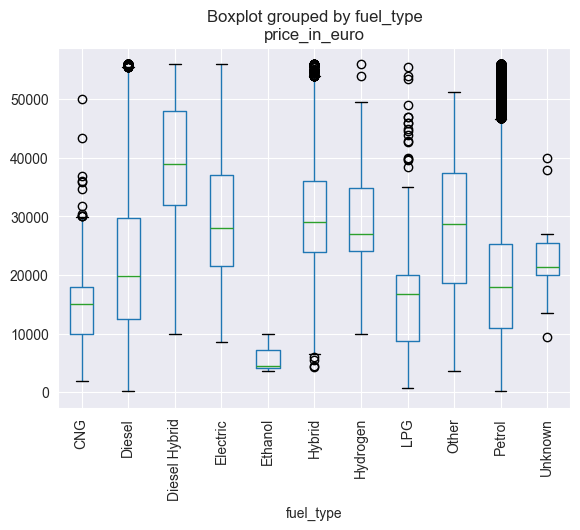

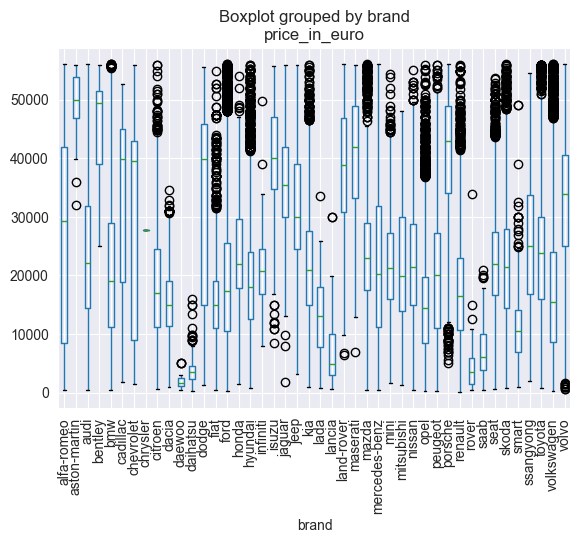

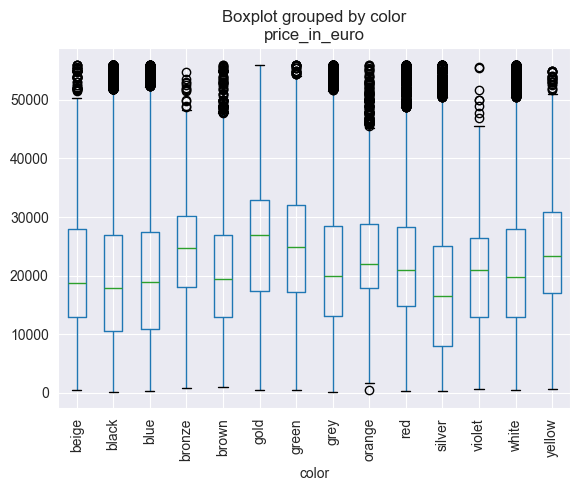

In [41]:
Ger_Used_Cars.boxplot(column=["price_in_euro"], by="transmission_type", rot = 90)
Ger_Used_Cars.boxplot(column=["price_in_euro"], by="fuel_type", rot = 90)
Ger_Used_Cars.boxplot(column=["price_in_euro"], by="brand", rot = 90)
Ger_Used_Cars.boxplot(column=["price_in_euro"], by="color", rot = 90)

Гистограммы

array([[<Axes: title={'center': 'year'}>]], dtype=object)

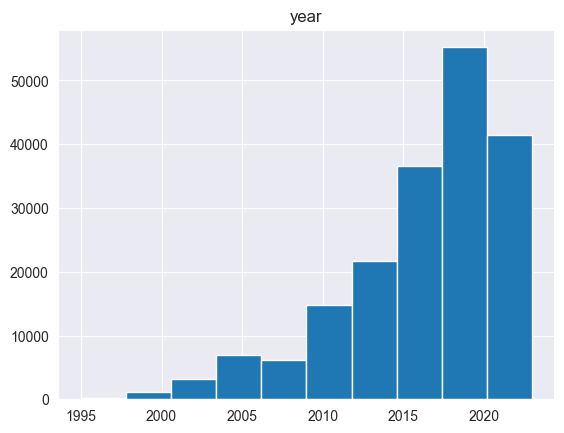

In [42]:
Ger_Used_Cars.hist(column="year")

Сортировка данных для представления в виде гистограммы

C:\Users\Admin\AppData\Local\Temp\ipykernel_1520\1022576800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ger_Used_Cars.sort_values('color', ascending = True, inplace = True)


<Axes: >

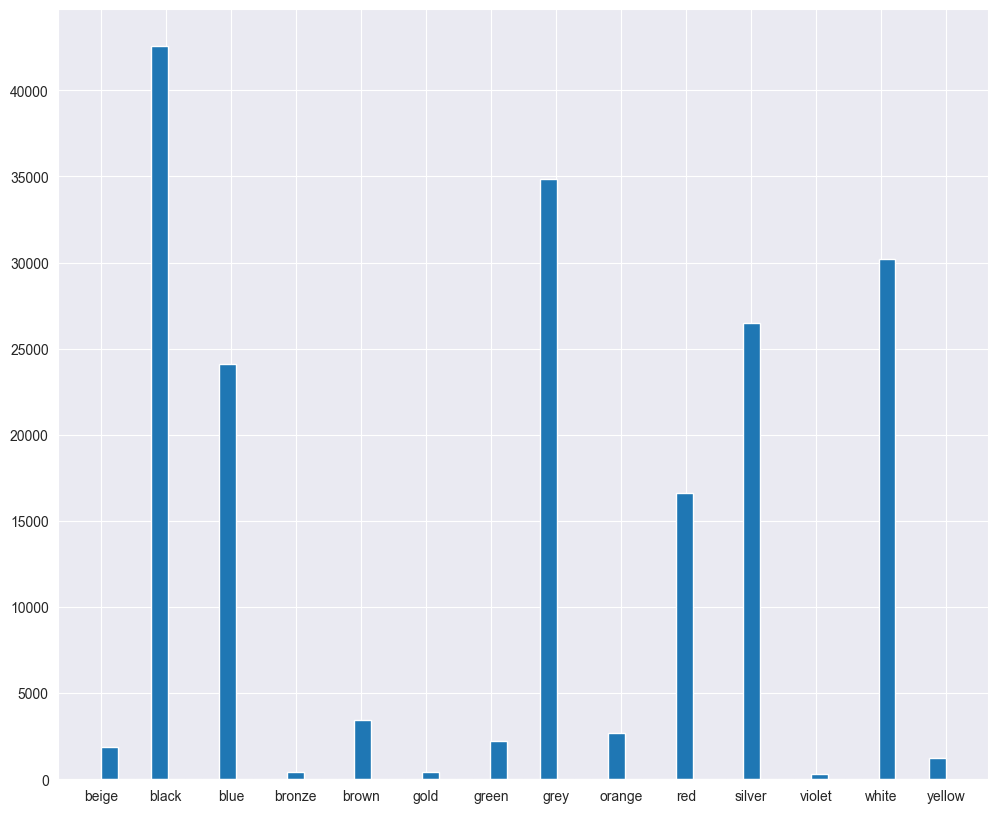

In [43]:
Ger_Used_Cars.sort_values('color', ascending = True, inplace = True)

Ger_Used_Cars['color'].hist(figsize=(12,10), bins=50)

Нормализация и сохранение данных:

In [44]:
from sklearn.preprocessing import MinMaxScaler

Ger_Used_Cars_old = Ger_Used_Cars.copy()
Ger_Used_Cars = Ger_Used_Cars.select_dtypes(include='number')
Ger_Used_Cars = Ger_Used_Cars.fillna(0)

In [45]:
Ger_Used_Cars

,Unnamed: 0,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
95078,95078,2019,39900,132,179,6.6,175.0,61544
189586,189586,2009,6900,118,160,7.0,163.0,146518
189587,189587,2009,6990,77,105,7.5,180.0,147000
189588,189588,2009,5499,44,60,5.9,140.0,53000
189590,189590,2009,3999,75,102,7.4,175.0,190500
...,...,...,...,...,...,...,...,...
125403,125403,2020,44160,140,190,5.0,133.0,35821
125405,125405,2020,33750,110,150,4.6,121.0,34784
125407,125407,2020,46999,120,163,7.1,186.0,63000
174712,174712,2021,12999,48,65,4.5,102.0,6532


In [46]:
scaler = MinMaxScaler()
Ger_Used_Cars_without_norm = Ger_Used_Cars.copy()
Ger_Used_Cars[Ger_Used_Cars.columns] = scaler.fit_transform(Ger_Used_Cars[Ger_Used_Cars.columns])

Ger_Used_Cars

,Unnamed: 0,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
95078,0.378687,0.857143,0.711733,0.212272,0.212195,0.008931,0.175175,0.016196
189586,0.755103,0.500000,0.120875,0.189055,0.189024,0.009472,0.163163,0.038557
189587,0.755107,0.500000,0.122487,0.121061,0.121951,0.010149,0.180180,0.038684
189588,0.755111,0.500000,0.095791,0.066335,0.067073,0.007984,0.140140,0.013947
189590,0.755119,0.500000,0.068933,0.117745,0.118293,0.010014,0.175175,0.050132
...,...,...,...,...,...,...,...,...
125403,0.499468,0.892857,0.788007,0.225539,0.225610,0.006766,0.133133,0.009427
125405,0.499476,0.892857,0.601619,0.175788,0.176829,0.006225,0.121121,0.009154
125407,0.499484,0.892857,0.838839,0.192371,0.192683,0.009608,0.186186,0.016579
174712,0.695861,0.928571,0.230076,0.072968,0.073171,0.006089,0.102102,0.001719


Таблица корреляции:

<Axes: >

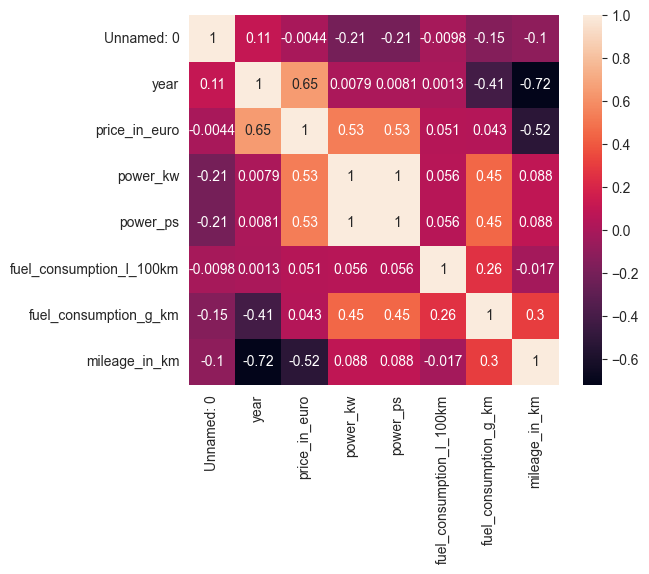

In [47]:
corr = Ger_Used_Cars.corr()
sns.heatmap(corr, annot=True, cbar=True, square=True)

In [49]:


Ger_Used_Cars_without_norm["transmission_type"] = Ger_Used_Cars_old["transmission_type"]
Ger_Used_Cars_without_norm["fuel_type"] = Ger_Used_Cars_old["fuel_type"]
Ger_Used_Cars_without_norm = Ger_Used_Cars_without_norm.drop("Unnamed: 0", axis=1)
Ger_Used_Cars_without_norm = Ger_Used_Cars_without_norm[Ger_Used_Cars_without_norm['transmission_type'] != 'Unknown']
Ger_Used_Cars_without_norm = Ger_Used_Cars_without_norm[Ger_Used_Cars_without_norm['transmission_type'] != 'Semi-automatic']
Ger_Used_Cars_without_norm.to_csv('not_normalized_data.csv', index=False)

Ger_Used_Cars_without_norm.loc[Ger_Used_Cars_without_norm['fuel_type'] == 'Electric', 'fuel_consumption_l_100km'] = 0



Ger_Used_Cars["transmission_type"] = Ger_Used_Cars_old["transmission_type"]
Ger_Used_Cars["fuel_type"] = Ger_Used_Cars_old["fuel_type"]
Ger_Used_Cars = Ger_Used_Cars.drop("Unnamed: 0", axis=1)
Ger_Used_Cars = Ger_Used_Cars[Ger_Used_Cars['transmission_type'] != 'Unknown']
Ger_Used_Cars = Ger_Used_Cars[Ger_Used_Cars['transmission_type'] != 'Semi-automatic']
Ger_Used_Cars.to_csv('normalized_data.csv', index=False)


Ger_Used_Cars.loc[Ger_Used_Cars['fuel_type'] == 'Electric', 'fuel_consumption_l_100km'] = 0

In [50]:
Ger_Used_Cars_without_norm.groupby('fuel_type').first().reset_index()

,fuel_type,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,transmission_type
0,CNG,2011,3290,85,116,7.8,181.0,304000,Automatic
1,Diesel,2019,39900,132,179,6.6,175.0,61544,Automatic
2,Diesel Hybrid,2020,36990,145,197,4.5,119.0,19359,Automatic
3,Electric,2022,51990,160,218,0.0,451.0,9720,Automatic
4,Ethanol,2008,3680,92,125,7.0,167.0,171000,Manual
5,Hybrid,2022,32990,79,107,4.2,96.0,9865,Automatic
6,Hydrogen,2022,35700,113,154,1.0,0.0,20,Automatic
7,LPG,2008,3350,99,135,8.6,205.0,222172,Automatic
8,Other,2020,24590,96,131,5.7,131.0,34865,Manual
9,Petrol,2009,6900,118,160,7.0,163.0,146518,Automatic
